# DonorsChoose

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import plotly.offline as offline

In [3]:
def _print(statement, arguments, do_print = True):
    
    if do_print:
        print(statement.format(*arguments))
    
    return

In [4]:
def print_lb(character, num = 60):

    print(character*num)
    
    return

In [5]:
def get_rounded_value(value, round_num = 3):
    
    return np.round(value, round_num)

## [1] EDA for Train Data

### [1.1] Reading train_data.csv

In [6]:
project_data = pd.read_csv("./data/train_data.csv")
project_data.head(n=2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1


#### [1..] Train DataFrame shape

In [7]:
_print("Project DataFrame Shape: {}", [project_data.shape])

Project DataFrame Shape: (109248, 17)


#### [1..] Columns Information

In [8]:
cols_ref = project_data.columns.values
_print("Project Data columns type: {}", [type(cols_ref)])

Project Data columns type: <class 'numpy.ndarray'>


In [9]:
_print("Project DataFrame columns {}", [cols_ref])

Project DataFrame columns ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [10]:
_print("Columns name with Data Type information : \n{}", [project_data.dtypes])

Columns name with Data Type information : 
Unnamed: 0                                       int64
id                                              object
teacher_id                                      object
teacher_prefix                                  object
school_state                                    object
project_submitted_datetime                      object
project_grade_category                          object
project_subject_categories                      object
project_subject_subcategories                   object
project_title                                   object
project_essay_1                                 object
project_essay_2                                 object
project_essay_3                                 object
project_essay_4                                 object
project_resource_summary                        object
teacher_number_of_previously_posted_projects     int64
project_is_approved                              int64
dtype: object


### [1.2] Data Analysis

In [11]:
y_value_counts = project_data["project_is_approved"].value_counts()

In [12]:
_print("1. y_value_counts Data Type  :{}", [type(y_value_counts)])
print_lb("=")
_print("2. project_is_approved values counts :\n\n{}", [y_value_counts])

1. y_value_counts Data Type  :<class 'pandas.core.series.Series'>
2. project_is_approved values counts :

1    92706
0    16542
Name: project_is_approved, dtype: int64


#### [1.2.1] Projects got approved and disapproved statistics

In [13]:
projects_approved_pctng = np.divide(y_value_counts[1], y_value_counts.sum()) * 100
projects_approved_pctng = get_rounded_value(projects_approved_pctng)

projects_disapproved_pctng = np.divide(y_value_counts[0], y_value_counts.sum()) * 100
projects_disapproved_pctng = get_rounded_value(projects_disapproved_pctng)

print("Number of projects that are approved for funding: {}, ({}{})".format(y_value_counts[1], projects_approved_pctng, " %"))
print("Number of projects that are not approved for funding: {}, ({}{})".format(y_value_counts[1], projects_disapproved_pctng, " %"))

Number of projects that are approved for funding: 92706, (84.858 %)
Number of projects that are not approved for funding: 92706, (15.142 %)


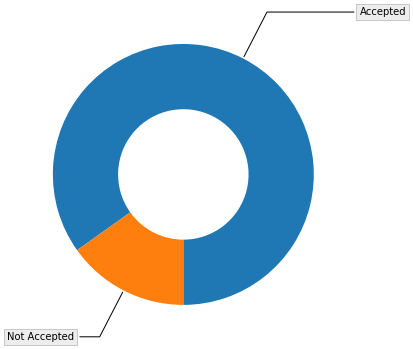

In [14]:
"""
deg2rad               : http://www.sosmath.com/tables/trigtable/trigtable.html
Matplotlib color docs : https://matplotlib.org/3.1.1/api/colors_api.html
ax.annotation docs    : https://matplotlib.org/3.2.1/tutorials/text/annotations.html#plotting-guide-annotation
"""

fig, ax = plt.subplots(figsize= (6, 6), subplot_kw=dict(aspect="equal"))
reciepe = ["Accepted", "Not Accepted"]
data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-90)

bbox_props = dict(boxstyle="square, pad=0.3", fc="#EDEDED", ec="#C7C7C7")
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle='-'),
         bbox=bbox_props, zorder=0, va='center')

sum = 0.0
for idx, p in enumerate(wedges):
    
    angle = (p.theta2 - p.theta1)/2. + p.theta1

    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))
    
    horizntalalignment = {-1:"Righ", 1:"Left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)
    
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(
                reciepe[idx], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizntalalignment, **kw
            )

### [1.3.2] Univariate Analysis

#### [1.3.2.1] Univariate Analysis: School State

In [15]:
school_state_value_counts = project_data['school_state'].value_counts()
_print("school_state values count \n{} ", [school_state_value_counts], False)

In [16]:
"""
Below code snippet explains usage of reset_index

temp = project_data.groupby('school_state')['project_is_approved'].apply(np.mean)
print(temp.index)
print(temp)
"""   

"\nBelow code snippet explains usage of reset_index\n\ntemp = project_data.groupby('school_state')['project_is_approved'].apply(np.mean)\nprint(temp.index)\nprint(temp)\n"

In [17]:
temp = project_data.groupby('school_state')['project_is_approved'].apply(np.mean).reset_index()
temp_df = pd.DataFrame(temp)
temp_df.columns = ['state_code', 'num_proposals']

temp_df.head( n = 3)

,state_code,num_proposals
0,AK,0.840580
1,AL,0.854711
2,AR,0.831268


In [18]:
import plotly.graph_objects as go
import plotly.offline as offline

#### [1.3.2.2] Create `choropleth` graph to demonstrate state wise project approval

In [ ]:
#https://plotly.github.io/plotly.py-docs/index.html

scl = [[0, '#00289E'], [0.1, '#002EB8'], [0.2, '#0034D1'], [0.3, '#003BEB'],
       [0.4, '#0544FF'], [0.5, '#1F57FF'], [0.6, '#386AFF'], [0.7, '#527DFF'],
       [0.7, '#6B90FF'], [0.8, '#85A3FF'], [0.9, '#9EB6FF'], [1, '#B8C9FF']]

data = [
    dict(
        type='choropleth',
        colorscale=scl,
        autocolorscale=False,
        locations=temp_df['state_code'],
        z=temp_df['num_proposals'].astype(float),
        locationmode='USA-states',
        text=temp_df['state_code'],
        marker=dict(line=dict(color='#666600', width=2)),
        colorbar=dict(title='% of pro')
    )
]

layout = dict(
    title='Project proposals % of Acceptance Rate by US States',
    geo=dict(
        scope='usa',
        projection=dict(type='albers usa'),
        showlakes=True,
        lakecolor='#FFB3FF'
    )
)

fig=go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-mapheat-map')